In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction

In [2]:
file_path = 'dataset/drt2568_0809.csv'

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.head()

,No.,Month,Year,Line,Number_Accident,Delay,Solving_Problem,Traction_System,Brake_System,Door_System,Electrification_System,Rail/Third Rail,Turnout_Point_Machine,Axel_Counter,Signalling_System,External,Other
0,1,มิถุนายน,2565,สายสีเขียว (สายสุขุมวิท),3,41,88,2,1,0,0,0,0,0.0,0,0,0
1,2,มิถุนายน,2565,สายสีเขียว (สายสีลม),1,37,104,0,0,0,0,0,1,0.0,0,0,0
2,3,มิถุนายน,2565,สายสีทอง,0,0,0,0,0,0,0,0,0,0.0,0,0,0
3,4,มิถุนายน,2565,สายสีน้ำเงิน,6,19,19,2,1,3,0,0,0,0.0,0,0,0
4,5,มิถุนายน,2565,สายสีม่วง,0,0,0,0,0,0,0,0,0,0.0,0,0,0


In [5]:
df.columns

Index(['No.', 'Month', 'Year', 'Line', 'Number_Accident', 'Delay',
       'Solving_Problem', 'Traction_System', 'Brake_System', 'Door_System',
       'Electrification_System', 'Rail/Third Rail', 'Turnout_Point_Machine',
       'Axel_Counter', 'Signalling_System', 'External', 'Other'],
      dtype='object')

In [6]:
df.shape

(370, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No.                     370 non-null    int64  
 1   Month                   370 non-null    object 
 2   Year                    370 non-null    int64  
 3   Line                    370 non-null    object 
 4   Number_Accident         370 non-null    int64  
 5   Delay                   370 non-null    int64  
 6   Solving_Problem         370 non-null    int64  
 7   Traction_System         370 non-null    int64  
 8   Brake_System            370 non-null    int64  
 9   Door_System             370 non-null    int64  
 10  Electrification_System  370 non-null    int64  
 11  Rail/Third Rail         370 non-null    int64  
 12  Turnout_Point_Machine   370 non-null    int64  
 13  Axel_Counter            369 non-null    float64
 14  Signalling_System       370 non-null    in

# Data Cleaning & Handling Outlier

ดูข้อมูลที่มีค่า null อยู่ เพื่อตรวจสอบความผิดปกติ

In [8]:
df[df['Axel_Counter'].isnull()]

,No.,Month,Year,Line,Number_Accident,Delay,Solving_Problem,Traction_System,Brake_System,Door_System,Electrification_System,Rail/Third Rail,Turnout_Point_Machine,Axel_Counter,Signalling_System,External,Other
178,177,กุมภาพันธ์,2567,สายสีเหลือง,0,0,0,0,0,0,0,0,0,NaN,0,0,0


พบว่าจำนวนเหตุฉุกเฉิน(Number_Accident) ที่เกิดขึ้นเป็นศูนย์ เพราะฉะนั้นข้อมูลตรงคอลัมน์ Axel_Counter ที่เป็นศูนย์อาจเป็นเพียงแค่การลืมใส่ข้อมูล

In [9]:
df['Axel_Counter'] = df['Axel_Counter'].fillna(0)

เราจึงเติมเลขศูนย์ใส่ในคอลัมน์ Axel_Counter ที่มีค่า null

In [10]:
df.isnull().sum()

No.                       0
Month                     0
Year                      0
Line                      0
Number_Accident           0
Delay                     0
Solving_Problem           0
Traction_System           0
Brake_System              0
Door_System               0
Electrification_System    0
Rail/Third Rail           0
Turnout_Point_Machine     0
Axel_Counter              0
Signalling_System         0
External                  0
Other                     0
dtype: int64

In [11]:
df.duplicated().sum()

0

เราจะเปลี่ยนชื่อคอลัมน์ใหม่ เพื่อให้ง่ายต่อการใช้งานและเพิ่มความเข้าใจของข้อมูลมากขึ้น

In [12]:
column_rename = {
    'No.': 'id',
    'Month': 'month',
    'Year': 'year',
    'Line': 'line',
    'Number_Accident': 'accident_count',
    'Delay': 'delay_minutes',
    'Solving_Problem': 'solving_time_minutes',
    'Traction_System': 'traction_sys',
    'Brake_System': 'brake_sys',
    'Door_System': 'door_sys',
    'Electrification_System': 'electric_sys',
    'Rail/Third Rail': 'rail_sys',
    'Turnout_Point_Machine': 'turnout_machine',
    'Axel_Counter': 'axel_counter',
    'Signalling_System': 'signalling_sys',
    'External': 'external_factors',
    'Other': 'others'
}

df.rename(columns=column_rename, inplace=True)

In [13]:
df.set_index('id')

,month,year,line,accident_count,delay_minutes,solving_time_minutes,traction_sys,brake_sys,door_sys,electric_sys,rail_sys,turnout_machine,axel_counter,signalling_sys,external_factors,others
id,,,,,,,,,,,,,,,,
1,มิถุนายน,2565,สายสีเขียว (สายสุขุมวิท),3,41,88,2,1,0,0,0,0,0.0,0,0,0
2,มิถุนายน,2565,สายสีเขียว (สายสีลม),1,37,104,0,0,0,0,0,1,0.0,0,0,0
3,มิถุนายน,2565,สายสีทอง,0,0,0,0,0,0,0,0,0,0.0,0,0,0
4,มิถุนายน,2565,สายสีน้ำเงิน,6,19,19,2,1,3,0,0,0,0.0,0,0,0
5,มิถุนายน,2565,สายสีม่วง,0,0,0,0,0,0,0,0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,กันยายน,2568,รถไฟฟ้าเชื่อมท่าอากาศยานสุวรรณภูมิ (Airport Ra...,2,14,14,0,0,1,0,0,0,0.0,0,0,1
365,กันยายน,2568,สายสีแดงเหนือ,0,0,0,0,0,0,0,0,0,0.0,0,0,0
366,กันยายน,2568,สายสีแดงตะวันตก,2,16,33,0,0,0,0,0,0,1.0,0,0,1


ลบช่องว่างระหว่างข้อความออก

In [14]:
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

In [15]:
print(df['month'].unique())
print("\n")
print(df['line'].unique())

['มิถุนายน' 'กรกฎาคม' 'สิงหาคม' 'กันยายน' 'ตุลาคม' 'พฤศจิกายน' 'ธันวาคม'
 'มกราคม' 'กุมภาพันธ์' 'มีนาคม' 'เมษายน' 'พฤษภาคม']


['สายสีเขียว (สายสุขุมวิท)' 'สายสีเขียว (สายสีลม)' 'สายสีทอง'
 'สายสีน้ำเงิน' 'สายสีม่วง'
 'รถไฟฟ้าเชื่อมท่าอากาศยานสุวรรณภูมิ (Airport Rail Link)' 'สายสีแดงเหนือ'
 'สายสีแดงตะวันตก' 'สายสีเหลือง' 'สายสีชมพู']


เปลี่ยนชื่อเดือนในคอลัมน์ month ให้เป็นภาษาอังกฤษเพื่อให้ง่ายต่อการนำมาใช้งาน

In [16]:
month_map = {
    'มกราคม': 'January',
    'กุมภาพันธ์': 'February',
    'มีนาคม': 'March',
    'เมษายน': 'April',
    'พฤษภาคม': 'May',
    'มิถุนายน': 'June',
    'กรกฎาคม': 'July',
    'สิงหาคม': 'August',
    'กันยายน': 'September',
    'ตุลาคม': 'October',
    'พฤศจิกายน': 'November',
    'ธันวาคม': 'December'
}

df['month'] = df['month'].map(month_map)

เช่นเดียวกับชื่อสายของรถไฟฟ้าเปลี่ยนเป็นภาษาอังกฤษเช่นกัน เผื่อในการพล็อตกราฟ

In [17]:
line_map = {
    'สายสีเขียว (สายสุขุมวิท)': 'Green Line (Sukhumvit Line)',
    'สายสีเขียว (สายสีลม)': 'Green Line (Silom Line)',
    'สายสีทอง': 'Gold Line',
    'สายสีน้ำเงิน': 'Blue Line',
    'สายสีม่วง': 'Purple Line',
    'รถไฟฟ้าเชื่อมท่าอากาศยานสุวรรณภูมิ (Airport Rail Link)': 'Airport Rail Link',
    'สายสีเหลือง': 'Yellow Line',
    'สายสีชมพู': 'Pink Line',
    'สายสีแดงเหนือ': 'Red Line (North)',
    'สายสีแดงตะวันตก': 'Red Line (West)'
}

df['line'] = df['line'].replace(line_map)

In [18]:
df.head()

,id,month,year,line,accident_count,delay_minutes,solving_time_minutes,traction_sys,brake_sys,door_sys,electric_sys,rail_sys,turnout_machine,axel_counter,signalling_sys,external_factors,others
0,1,June,2565,Green Line (Sukhumvit Line),3,41,88,2,1,0,0,0,0,0.0,0,0,0
1,2,June,2565,Green Line (Silom Line),1,37,104,0,0,0,0,0,1,0.0,0,0,0
2,3,June,2565,Gold Line,0,0,0,0,0,0,0,0,0,0.0,0,0,0
3,4,June,2565,Blue Line,6,19,19,2,1,3,0,0,0,0.0,0,0,0
4,5,June,2565,Purple Line,0,0,0,0,0,0,0,0,0,0.0,0,0,0


In [19]:
df['line'].unique()

array(['Green Line (Sukhumvit Line)', 'Green Line (Silom Line)',
       'Gold Line', 'Blue Line', 'Purple Line', 'Airport Rail Link',
       'Red Line (North)', 'Red Line (West)', 'Yellow Line', 'Pink Line'],
      dtype=object)

เรามีการเพิ่มข้อมูลของเจ้าของโครงการรถไฟฟ้า (owner) และผู้ให้บริการรถไฟฟ้า (operator) แต่ละสาย เผื่อในกรณีที่ต้องการวิเคราะห์เชิงลึกไปถึงระดับเจ้าของและผู้ให้บริการ ซึ่งต้องมีการค้นหาข้อมูลของรถไฟฟ้าแต่ละสาย

In [20]:
rail_structure = {
    'Green Line (Sukhumvit Line)': {'owner': 'BMA', 'operator': 'BTS'},
    'Green Line (Silom Line)': {'owner': 'BMA', 'operator': 'BTS'},
    'Gold Line': {'owner': 'BMA', 'operator': 'BTS'},
    'Yellow Line': {'owner': 'MRT', 'operator': 'EBM'},
    'Pink Line': {'owner': 'MRT', 'operator': 'NBM'},
    'Blue Line': {'owner': 'MRT', 'operator': 'BEM'},
    'Purple Line': {'owner': 'MRT', 'operator': 'BEM'},
    'Airport Rail Link': {'owner': 'SRT', 'operator': 'AERA1'},
    'Red Line (North)': {'owner': 'SRT', 'operator': 'SRTET'},
    'Red Line (West)': {'owner': 'SRT', 'operator': 'SRTET'}
}

df['owner'] = [rail_structure[line]['owner'] for line in df['line']]
df['operator'] = [rail_structure[line]['operator'] for line in df['line']]

In [21]:
df.head()

,id,month,year,line,accident_count,delay_minutes,solving_time_minutes,traction_sys,brake_sys,door_sys,electric_sys,rail_sys,turnout_machine,axel_counter,signalling_sys,external_factors,others,owner,operator
0,1,June,2565,Green Line (Sukhumvit Line),3,41,88,2,1,0,0,0,0,0.0,0,0,0,BMA,BTS
1,2,June,2565,Green Line (Silom Line),1,37,104,0,0,0,0,0,1,0.0,0,0,0,BMA,BTS
2,3,June,2565,Gold Line,0,0,0,0,0,0,0,0,0,0.0,0,0,0,BMA,BTS
3,4,June,2565,Blue Line,6,19,19,2,1,3,0,0,0,0.0,0,0,0,MRT,BEM
4,5,June,2565,Purple Line,0,0,0,0,0,0,0,0,0,0.0,0,0,0,MRT,BEM


เรียงคอลัมน์ในชุดข้อมูลใหม่เพื่อให้ดูเรียบง่ายมากขึ้น

In [22]:
df_reordered = df.iloc[:, [0, 1, 2, 3, 17, 18, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16]]

In [23]:
df_reordered.head()

,id,month,year,line,owner,operator,accident_count,delay_minutes,solving_time_minutes,traction_sys,brake_sys,door_sys,electric_sys,rail_sys,turnout_machine,axel_counter,signalling_sys,external_factors,others
0,1,June,2565,Green Line (Sukhumvit Line),BMA,BTS,3,41,88,2,1,0,0,0,0,0.0,0,0,0
1,2,June,2565,Green Line (Silom Line),BMA,BTS,1,37,104,0,0,0,0,0,1,0.0,0,0,0
2,3,June,2565,Gold Line,BMA,BTS,0,0,0,0,0,0,0,0,0,0.0,0,0,0
3,4,June,2565,Blue Line,MRT,BEM,6,19,19,2,1,3,0,0,0,0.0,0,0,0
4,5,June,2565,Purple Line,MRT,BEM,0,0,0,0,0,0,0,0,0,0.0,0,0,0


In [24]:
df_reordered.shape

(370, 19)

ส่วนนี้เราจะโฟกัสที่ระยะเวลาที่รถไฟฟ้าเกิดความล่าช้า โดยการหา outlier หมายถึงเวลาที่รถไฟฟ้าล่าช้ามากผิดปกติ

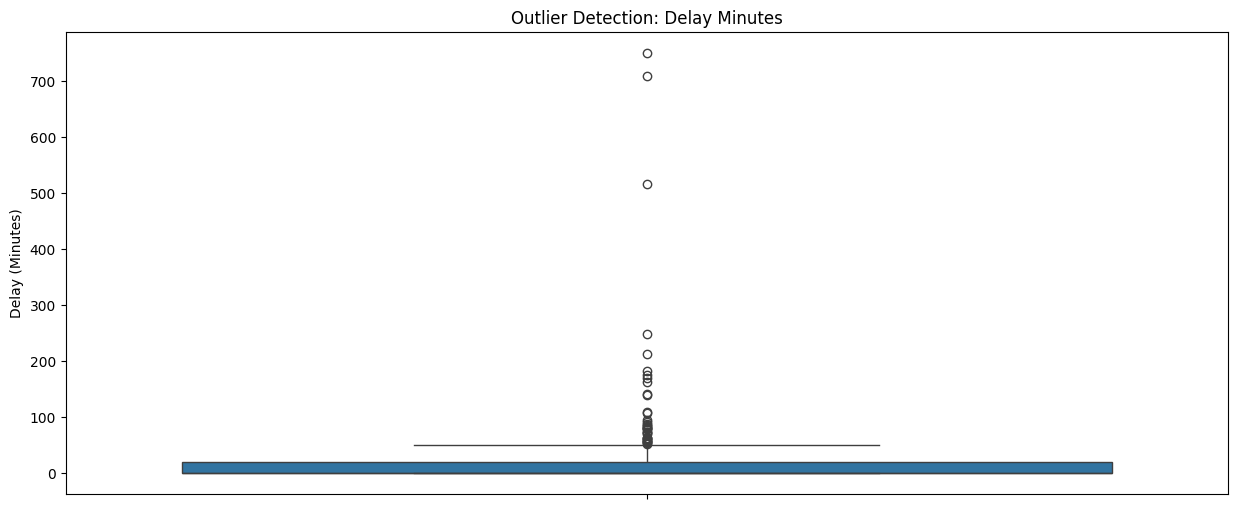

In [25]:
plt.figure(figsize=(15, 6))
sns.boxplot(y='delay_minutes', data=df_reordered)

plt.title('Outlier Detection: Delay Minutes')
plt.ylabel('Delay (Minutes)')
plt.show()

คำนวณ IQR เพื่อนำมาใช้หาขอบเขตของข้อมูลและเพื่อตรวจหา outlier ซึ่ง outlier หมายถึงเวลาที่ล่าช้าแบบผิดปกติ

In [26]:
Q1 = df_reordered['delay_minutes'].quantile(0.25)
Q3 = df_reordered['delay_minutes'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

# ข้อมูลกลุ่มที่ delay นานผิดปกติ
outliers_df = df_reordered[df_reordered['delay_minutes'] > upper_bound]
outliers_df[['month', 'year', 'line', 'operator', 'delay_minutes', 'accident_count', 'traction_sys']]

50.0


,month,year,line,operator,delay_minutes,accident_count,traction_sys
5,June,2565,Airport Rail Link,AERA1,55,4,2
13,July,2565,Airport Rail Link,AERA1,110,6,1
24,September,2565,Green Line (Sukhumvit Line),BTS,92,4,1
29,September,2565,Airport Rail Link,AERA1,140,9,2
37,October,2565,Airport Rail Link,AERA1,80,3,1
61,January,2566,Airport Rail Link,AERA1,52,5,2
63,January,2566,Red Line (West),SRTET,162,5,0
69,February,2566,Airport Rail Link,AERA1,54,3,3
75,March,2566,Blue Line,BEM,60,1,0
85,April,2566,Airport Rail Link,AERA1,61,2,2


# Statistical Analysis

1. หาว่าการที่รถไฟฟ้าล่าช้าผิดปกตินั้น เกิดปัญหาที่ระบบอะไรบ้าง

Causes of Major Delays (Outliers):
traction_sys        34.0
turnout_machine     29.0
brake_sys           18.0
signalling_sys      16.0
door_sys            12.0
electric_sys         7.0
rail_sys             7.0
external_factors     6.0
axel_counter         3.0
dtype: float64


C:\Users\phwy3\AppData\Local\Temp\ipykernel_17488\1498275842.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=outlier_analysis.values, y=outlier_analysis.index, palette="Reds_r")


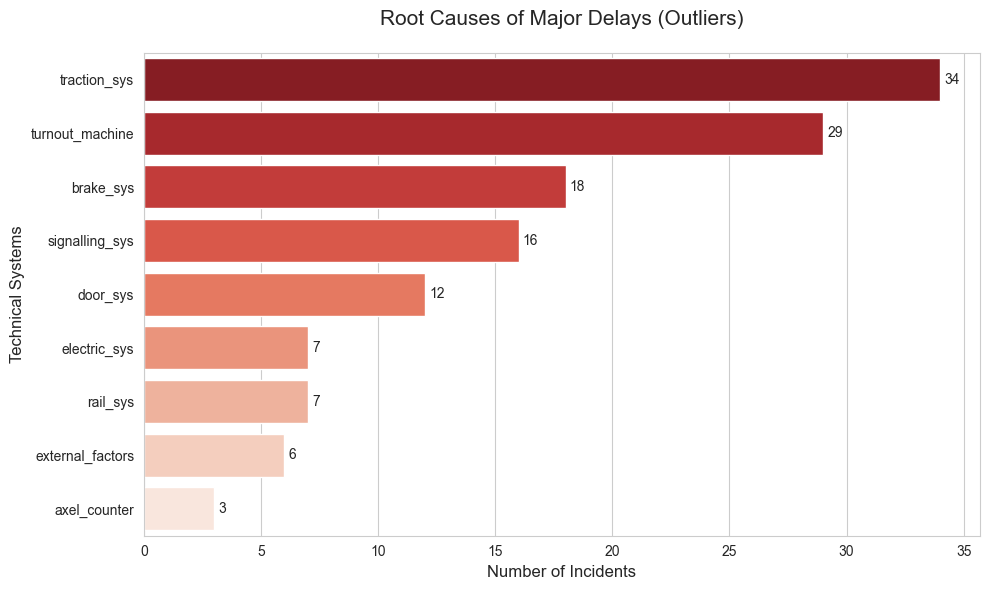

In [27]:
system_cols = ['traction_sys', 'brake_sys', 'door_sys', 'electric_sys', 
               'rail_sys', 'turnout_machine', 'axel_counter', 'signalling_sys', 'external_factors']

# สรุปว่าใน 38 ครั้งนี้ แต่ละระบบขัดข้องกี่ครั้ง
outlier_analysis = df_reordered.loc[outliers_df.index, system_cols].sum().sort_values(ascending=False)
print("Causes of Major Delays (Outliers):")
print(outlier_analysis)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

ax = sns.barplot(x=outlier_analysis.values, y=outlier_analysis.index, palette="Reds_r")

# ใส่ตัวเลขจำนวนครั้งที่ปลายแท่งกราฟ
for i in ax.containers:
    ax.bar_label(i, padding=3)

plt.title('Root Causes of Major Delays (Outliers)', fontsize=15, pad=20)
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Technical Systems', fontsize=12)

plt.tight_layout()
plt.show()

- จะเห็นว่าการที่รถไฟฟ้าล่าช้านานผิดปกติ ระบบสองอันดับแรกที่เกิดปัญหานั้นคือ ระบบขับเคลื่อนของรถไฟฟ้า (trantion_sys) โดยเกิดปัญหาทั้งหมด 34 ครั้ง และปัญหาเกี่ยวกับจุดสับราง (turnout_machine) ทั้งหมด 29 ครั้ง จากความล่าช้าผิดปกติทีเกิดขึ้นทั้งหมด 38 ครั้ง

2. หาว่าความล่าช้าที่ผิดปกติเกิดขึ้นกับ ผู้ให้บริการไหน และ รถไฟฟ้าสายไหนบ้าง

C:\Users\phwy3\AppData\Local\Temp\ipykernel_17488\3015784497.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=operator_outliers.values, y=operator_outliers.index, ax=ax1, palette="viridis")
C:\Users\phwy3\AppData\Local\Temp\ipykernel_17488\3015784497.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=line_outliers.values, y=line_outliers.index, ax=ax2, palette="magma")


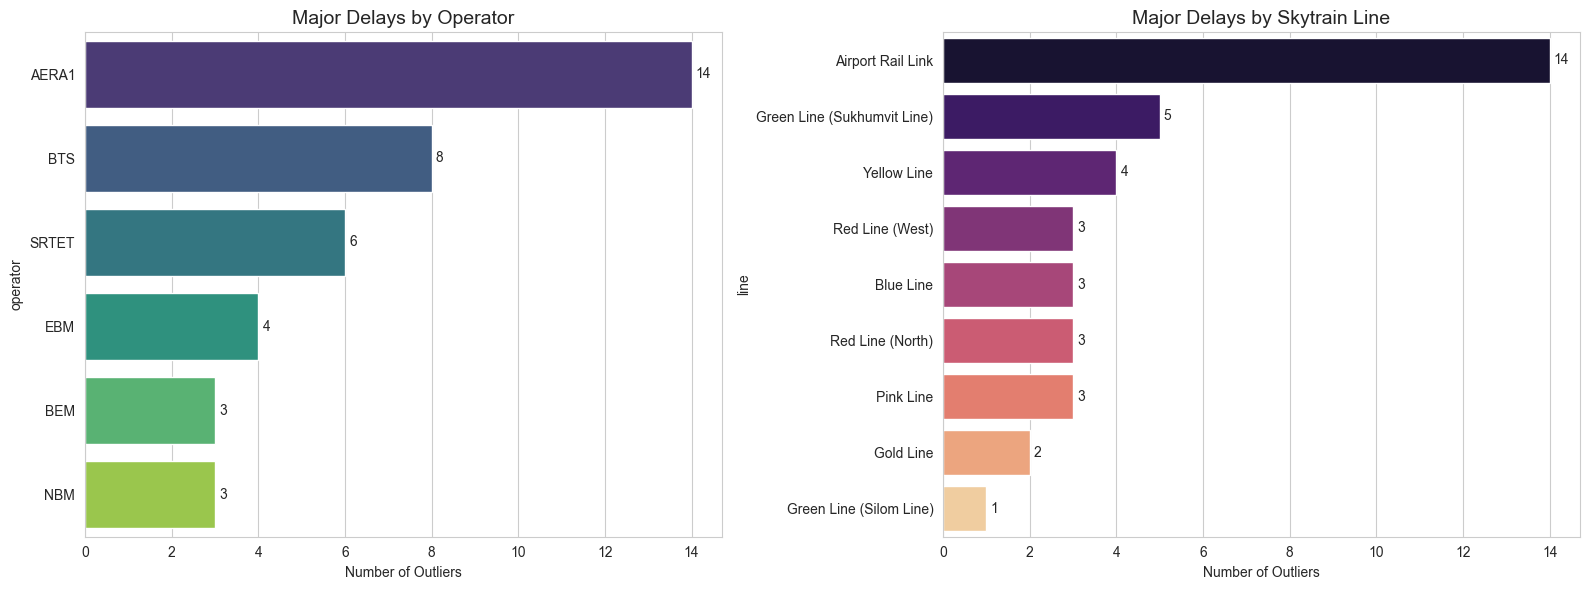

In [28]:
operator_outliers = df_reordered.loc[outliers_df.index, 'operator'].value_counts()
line_outliers = df_reordered.loc[outliers_df.index, 'line'].value_counts()

# สร้างพื้นที่สำหรับ 2 กราฟข้างกัน
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# กราฟที่ 1: Outliers by Operator
sns.barplot(x=operator_outliers.values, y=operator_outliers.index, ax=ax1, palette="viridis")
ax1.set_title('Major Delays by Operator', fontsize=14)
ax1.set_xlabel('Number of Outliers')
for i in ax1.containers: ax1.bar_label(i, padding=3)

# กราฟที่ 2: Outliers by Line
sns.barplot(x=line_outliers.values, y=line_outliers.index, ax=ax2, palette="magma")
ax2.set_title('Major Delays by Skytrain Line', fontsize=14)
ax2.set_xlabel('Number of Outliers')
for i in ax2.containers: ax2.bar_label(i, padding=3)

plt.tight_layout()
plt.show()

- ปัญหารถไฟฟ้าล่าช้าผิดปกติที่พบมากที่สุดคือรถไฟฟ้า Airport Rail Link ที่มีผู้ให้บริการคือ AERA1 โดยเกิดปัญหาทั้งหมด 14 ครั้ง

3. หาว่ารถไฟฟ้าสายไหนพบปัญหาที่ระบบขับเคลื่อนเยอะที่สุด

C:\Users\phwy3\AppData\Local\Temp\ipykernel_17488\73925551.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=traction_outliers.values, y=traction_outliers.index, palette="Oranges_r")


line
Airport Rail Link              26
Green Line (Sukhumvit Line)     3
Gold Line                       2
Red Line (North)                2
Pink Line                       1
Blue Line                       0
Green Line (Silom Line)         0
Red Line (West)                 0
Yellow Line                     0
Name: traction_sys, dtype: int64


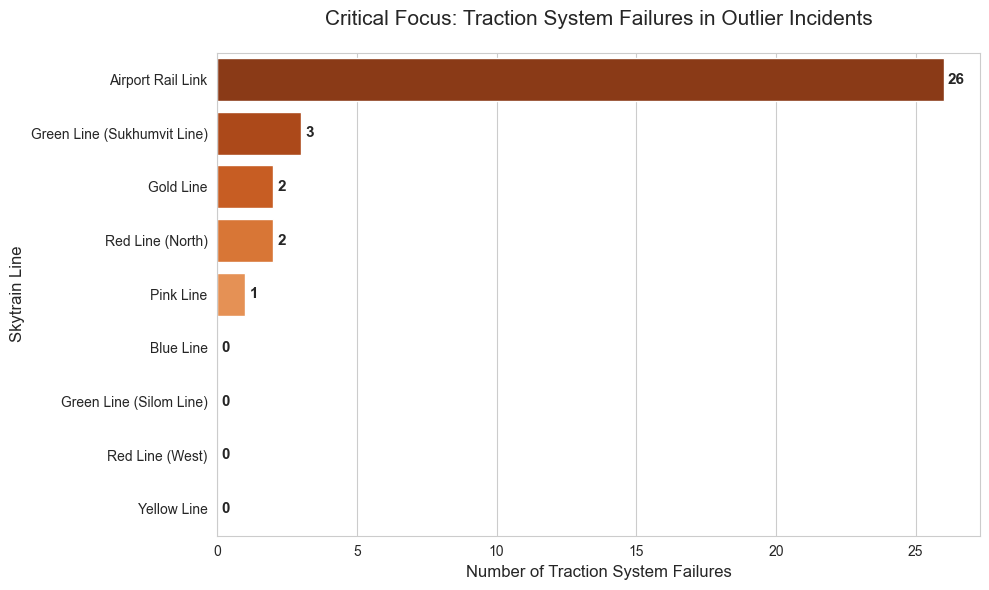

In [29]:
traction_outliers = df_reordered.loc[outliers_df.index].groupby('line')['traction_sys'].sum().sort_values(ascending=False)
print(traction_outliers)

plt.figure(figsize=(10, 6))

ax = sns.barplot(x=traction_outliers.values, y=traction_outliers.index, palette="Oranges_r")

for i in ax.containers:
    ax.bar_label(i, padding=3, fontsize=11, fontweight='bold')

plt.title('Critical Focus: Traction System Failures in Outlier Incidents', fontsize=15, pad=20)
plt.xlabel('Number of Traction System Failures', fontsize=12)
plt.ylabel('Skytrain Line', fontsize=12)

plt.tight_layout()
plt.show()

- ปัญหาที่พบบ่อยสุดที่ทำให้รถไฟฟ้า Airport Rail Link ล่าช้ากว่าปกติคือ ปัญหาที่ระบบขับเคลื่อน (traction_system) ซึ่งในแต่ละเดือนที่เกิดปัญหาจะเกิดปัญหาที่ระบบขับเคลื่อนหลายรอบ ซึ่งรวมกันได้ทั้งหมดคือ 26 ครั้ง จึงอาจเป็นการบอกว่ารถไฟฟ้าที่ใช้อาจต้องดูแลส่วนนี้เป็นพิเศษหรือบ่งบอกถึงอายุการใช้งานรถไฟฟ้าที่อาจจะเก่าแล้ว

4. หาเวลาที่ล่าช้าโดยเฉลี่ยของรถไฟฟ้าแต่ละสายในสถานการณ์ปกติ เปรียบเทียบกับ สถานการณ์ฉุกเฉินหรือเกิดเหตุขัดข้องรุนแรง

Performance in Normal Days:
 line
Airport Rail Link              20.423077
Blue Line                       9.216216
Gold Line                      12.526316
Green Line (Silom Line)         4.358974
Green Line (Sukhumvit Line)    13.114286
Pink Line                       5.947368
Purple Line                     0.625000
Red Line (North)                9.027027
Red Line (West)                 5.918919
Yellow Line                     1.875000
Name: delay_minutes, dtype: float64

Performance during Major Crises:
 line
Airport Rail Link               92.142857
Blue Line                       72.666667
Gold Line                       71.500000
Green Line (Silom Line)         71.000000
Green Line (Sukhumvit Line)     71.000000
Pink Line                      368.666667
Red Line (North)               132.000000
Red Line (West)                108.666667
Yellow Line                    374.000000
Name: delay_minutes, dtype: float64


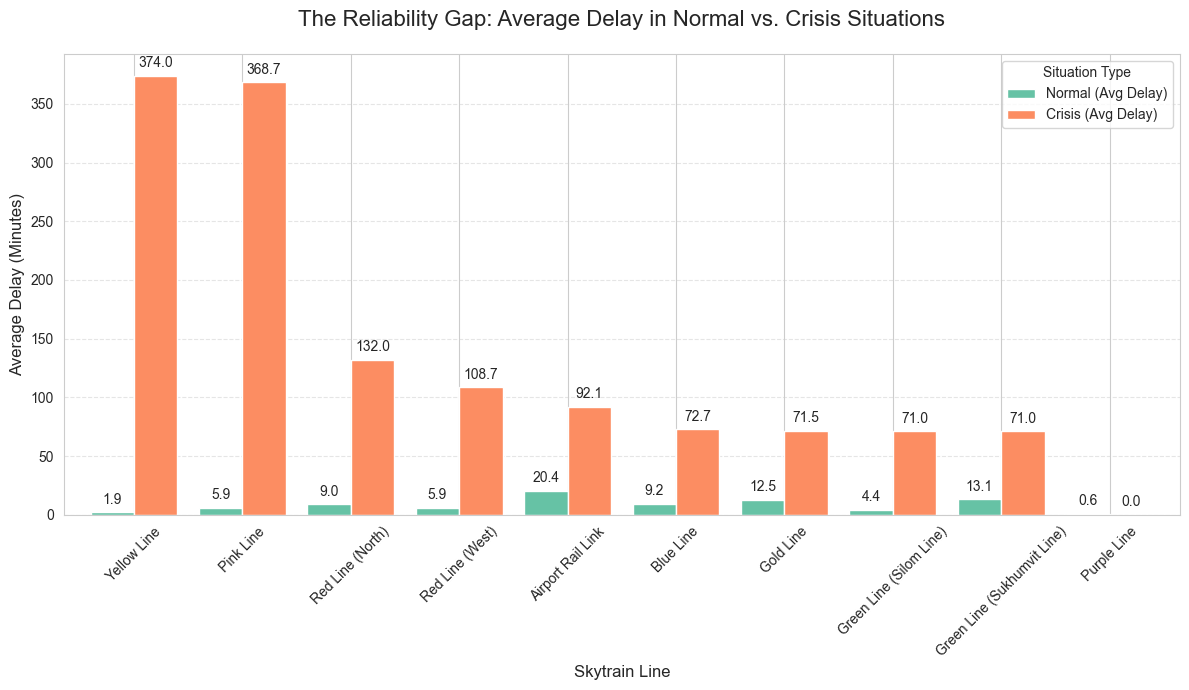

In [30]:
df_normal = df_reordered.drop(outliers_df.index)

# 2. ดูค่าเฉลี่ยดีเลย์ของแต่ละ line ในสถานการณ์ปกติ
normal_performance = df_normal.groupby('line')['delay_minutes'].mean()

# 3. ดูค่าดีเลย์เฉลี่ยของแต่ละ line ในสถานการณ์ฉุกเฉิน
crisis_performance = df_reordered.loc[outliers_df.index].groupby('line')['delay_minutes'].mean()

print("Performance in Normal Days:\n", normal_performance)
print("\nPerformance during Major Crises:\n", crisis_performance)

plot_df = pd.DataFrame({
    'Normal (Avg Delay)': normal_performance,
    'Crisis (Avg Delay)': crisis_performance
}).sort_values(by='Crisis (Avg Delay)', ascending=False)

ax = plot_df.plot(kind='bar', figsize=(12, 7), color=['#66c2a5', '#fc8d62'], width=0.8)

plt.title('The Reliability Gap: Average Delay in Normal vs. Crisis Situations', fontsize=16, pad=20)
plt.ylabel('Average Delay (Minutes)', fontsize=12)
plt.xlabel('Skytrain Line', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Situation Type")

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
#df_reordered['is_outlier'] = df_reordered.index.isin(outliers_df.index)
#df_reordered.to_csv('bkk_railway_processed.csv', index=False, encoding='utf-8-sig')

จากข้อมูลด้านบนจะเห็นว่าเวลาล่าช้าของรถไฟฟ้าแต่ละสายโดยเฉลี่ย:
- ในสถานการณ์ปกติมีตั้งแต่ไม่ถึง 1 นาที จนถึงประมาณ 20 นาที
- ในสถานการณ์ที่เกิดความผิดปกติหรือเกิดเหตุขัดข้องที่รุนแรงอาจมีความล่าช้าตั้งแต่ประมาณ 1 ชั่วโมง ถึง 6 ชั่วโมง 

# Conclusion
- จากกราฟเปรียบเทียบเวลาที่ล่าช้าเฉลี่ยกับสายรถไฟฟ้าจะเห็นว่าเมื่อเกิดเหตุการณ์ขัดข้องรุนแรงเวลาที่ผู้โดยสารต้องรอจากปกติที่รอเพียงไม่กี่นาที อาจพุ่งไปถึงหลักชั่วโมงจนถึงหลายชั่วโมงได้
- การล่าช้าผิดปกติส่วนใหญ่จะพบที่ Airport Rail Link ซึ่งสาเหตุที่พบส่วนใหญ่ก็คือระบบขับเคลื่อนของตัวรถ (Traction_system)